# Daniel Gómez
## MB2
### Taller no. 4

# Problema 1
La curva con ecuación:
$$2y^3+y^2-y^5 = x^4- 2x^3+x^2$$
* se ha relacionado a un carretón que rebota. Utilice un 
sistema algebraico computacional para la curva y descubra por qué.
* ¿En cuántos puntos esta curva tiene rectas tangentes 
 horizontales? Encuentre las coordenadas x de estos 
 puntos.


In [1]:
from sympy import * #importar las galerías
import numpy as np

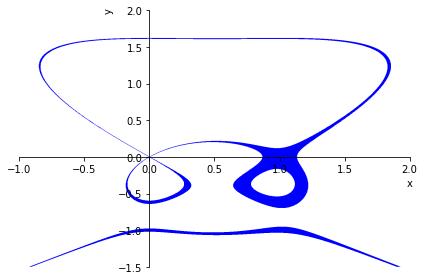

In [2]:
x,y=symbols("x y",real=True)
plot_implicit(Eq(2*y**3+y**2-y**5 , x**4- 2*x**3+x**2),(x,-1,2),(y,-1.5,2))

In [3]:
y=symbols("y",cls=Function) #Definir que variable es la independiente
init_printing()

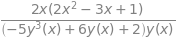

In [4]:
exp=2*y(x)**3+y(x)**2-y(x)**5-(x**4- 2*x**3+x**2)
s=solve(diff(exp,x),diff(y(x))) #se resuelve la derivada implicita de ambas funciones y se pasan todos los terminos a 1 lado
s[0]

In [5]:
num,den=fraction(s[0]) #Extraer el númerador
num

In [6]:
xi=solve(num) # se iguala el numerador a 0 y se obtienen las soluciones donde se encuentran las posibles rectas tangentes
xi

In [7]:
yi=symbols("yi")
p1=solve(exp.subs({y(x):yi,x:0}),yi) # Que me resuelva dejando Yi como vairable independiente
p1.pop(1) #extraer la solución 0
p1

In [8]:
p2=solve(exp.subs({y(x):yi,x:1/2}))[0:3] #extrayendo las soluciones reales
p2 

In [9]:
p3=solve(exp.subs({y(x):yi,x:1}))
p3.pop(1)
p3

In [10]:
puntos_a=[(0,i) for i in p1]
puntos_b=[(0.5,i) for i in p2]
puntos_c=[(1,i) for i in p3]
puntos=puntos_a+puntos_b+puntos_c
puntos

In [11]:
import pandas as pd # se utiliza para hacer las tablas más presentables
f=pd.DataFrame(zip(puntos),columns=["puntos"])
f

,puntos
0,"(0, -1)"
1,"(0, 1/2 - sqrt(5)/2)"
2,"(0, 1/2 + sqrt(5)/2)"
3,"(0.5, -1.04933805486684)"
4,"(0.5, 0.210423812230509)"
5,"(0.5, 1.61392119045233)"
6,"(1, -1)"
7,"(1, 1/2 - sqrt(5)/2)"
8,"(1, 1/2 + sqrt(5)/2)"


In [12]:
d=pd.DataFrame(puntos,columns=["x","y"])
d

,x,y
0,0.0,-1
1,0.0,1/2 - sqrt(5)/2
2,0.0,1/2 + sqrt(5)/2
3,0.5,-1.04933805486684
4,0.5,0.210423812230509
5,0.5,1.61392119045233
6,1.0,-1
7,1.0,1/2 - sqrt(5)/2
8,1.0,1/2 + sqrt(5)/2


# Problema 2
### Aplicación de integrales

Encuentre el area encerrada por las curvas y grafique:
* $$y=x^{3}-3x-1$$ 
* $$y=\frac{x^{2}}{2}+2x-2$$

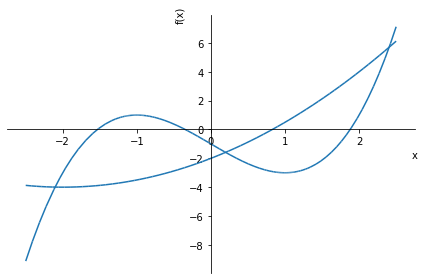

In [13]:
plot(x**3-3*x-1,(x**2)/2+2*x-2, (x,-2.5,2.5),grid=True)

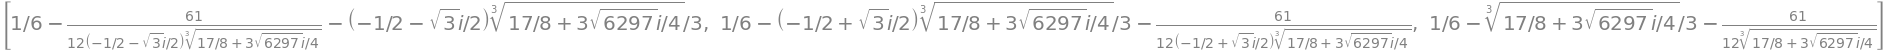

In [14]:
expr1=(x**3-3*x-1-((x**2)/2+2*x-2))
sol=solve(expr1)
sol

In [15]:
solre=[re(i).n(3) for i in sol]         # parte real de soluciones
solre

In [16]:
area1=integrate(abs(expr1),(x,solre[0],solre[1])).n()   # área 1
area2=integrate(abs(expr1),(x,solre[1],solre[2])).n()   # área 2
area1

In [17]:
area2

In [18]:
areat=area1+area2  # área total
areat

Text(-1, 2, 'areat= -6.81503830838997')

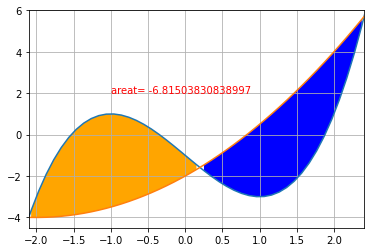

In [19]:
from pylab import *   # pylab
x=linspace(-5,5,100)  # vector en x
y1=x**3-3*x-1         # curva 1
y2=x**2/2+2*x-2       #curva 2
plot(x,y1,x,y2)       # grafico
xlim(-2.1,2.4)        # limite en x
ylim(-4.5,6)          # limite en y
grid(true)             # cuadricula
fill_between(x,y1,y2,y1>y2,facecolor="orange") #área entre y1, y2 cuando y1> y2
fill_between(x,y1,y2,y2>y1,facecolor="blue")   #área entre y1,y2  cuando y1<y2
text(-1,2,"areat= "+str(areat),size=10,color="red")  #texto

# Problema 3
### Implemente el  método de Newton sin sympy

In [20]:
for i in range (10): #como funciona el ciclo for
    print("hoy es el último taller")

hoy es el último taller
hoy es el último taller
hoy es el último taller
hoy es el último taller
hoy es el último taller
hoy es el último taller
hoy es el último taller
hoy es el último taller
hoy es el último taller
hoy es el último taller


In [21]:
import pandas as pd
# Problema 3 Método de Newton 
def newton(func,der,xi,n):
    x=[xi]
    ni=[0]
    for i in range(1,n):
        xi=x[i-1]+func(x[i-1])/der(x[i-1])
        x.append(xi)
        ni.append(i)
    tabla=pd.DataFrame(zip(ni,x),columns=["n","x"])
    return(tabla)
    

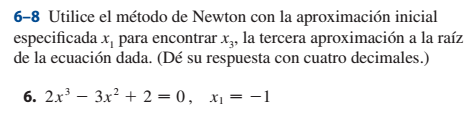

In [22]:
newton(lambda x:2*x**3-3*x**2+2,lambda x:6*x**2-6*x,-1,5)

,n,x
0,0,-1.000000
1,1,-1.250000
2,2,-1.640741
3,3,-2.214274
4,4,-3.020346


# Problema 4  
### implemente el método de Newton con SimPy

In [23]:
import pandas as pd
# Problema 3 Método de Newton 
def newton2(func,xi,n):
    val=[xi]
    ni=[0]
    for i in range(1,n):
        xi=val[i-1]+func.subs(x,val[i-1])/func.diff(x).subs(x,val[i-1])
        val.append(xi.n(4))
        ni.append(i)
    tabla=pd.DataFrame(zip(ni,val),columns=["n","x"])
    return(tabla)

In [24]:
x=symbols("x")
newton2(2*x**3-3*x**2+2,-1,10)

,n,x
0,0,-1
1,1,-1.250
2,2,-1.641
3,3,-2.214
4,4,-3.020
5,5,-4.125
6,6,-5.618
7,7,-7.624
8,8,-10.31
9,9,-13.89


In [25]:
func=input("ingrese la funcion")
der=input("ingrese la derivada")
xo=float(input("valor inicial de x"))
n=int(input("número de iteraciones"))
f1=lambda x:eval(func)
f2=lambda x:eval(der)
newton(f1,f2,xo,n)

ingrese la funcion2*x**3-3*x**2+2
ingrese la derivada6*x**2-6*x
valor inicial de x-1
número de iteraciones10


,n,x
0,0,-1.000000
1,1,-1.250000
2,2,-1.640741
3,3,-2.214274
4,4,-3.020346
5,5,-4.124888
6,6,-5.618228
7,7,-7.623490
8,8,-10.306922
9,9,-13.891629
